In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spotipy --upgrade

  Attempting uninstall: spotipy
    Found existing installation: spotipy 2.21.0
    Uninstalling spotipy-2.21.0:
      Successfully uninstalled spotipy-2.21.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd 
import numpy as np
import spotipy
from lazypredict.Supervised import LazyClassifier
from spotipy.oauth2 import SpotifyClientCredentials 
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [8]:
sp = spotipy.Spotify() 

cid ="d062190fd93b4e4488e75ae2d9256814" 

secret = "5afbd4a19ee54607be0db6036fb417c2"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [9]:
playlist_l = sp.user_playlist("Liked", "3cYqEaPBFyxqlXbViPtzDv?si=1bc50f6b00544370") 
playlist_d = sp.user_playlist("Disliked", "4HC1kIY2bof1CHfZqmo8u1?si=f68682ea53a8443f") 

playlist_l
playlist_d

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/4HC1kIY2bof1CHfZqmo8u1'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/playlists/4HC1kIY2bof1CHfZqmo8u1?additional_types=track',
 'id': '4HC1kIY2bof1CHfZqmo8u1',
 'images': [{'height': 640,
   'url': 'https://mosaic.scdn.co/640/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b27360f480a8aa3962660f3ee020ab67616d0000b27386132f159a302a913f93c2fcab67616d0000b273b142f571a1aae1f415a4bf29',
   'width': 640},
  {'height': 300,
   'url': 'https://mosaic.scdn.co/300/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b27360f480a8aa3962660f3ee020ab67616d0000b27386132f159a302a913f93c2fcab67616d0000b273b142f571a1aae1f415a4bf29',
   'width': 300},
  {'height': 60,
   'url': 'https://mosaic.scdn.co/60/ab67616d0000b2734c9476a0b18a79e53ab01816ab67616d0000b27360f480a8aa3962660f3ee020ab67616d0000b27386132f159a302a913f93c2fcab67616d0000b273b142f571a1aae1f415a4

In [10]:
liked_songs = playlist_l["tracks"]["items"] 

In [11]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [12]:
liked_features = sp.audio_features(liked_ids) 

liked_features

[{'danceability': 0.271,
  'energy': 0.165,
  'key': 5,
  'loudness': -20.652,
  'mode': 1,
  'speechiness': 0.0351,
  'acousticness': 0.729,
  'instrumentalness': 1.6e-06,
  'liveness': 0.118,
  'valence': 0.203,
  'tempo': 77.082,
  'type': 'audio_features',
  'id': '29U7stRjqHU6rMiS8BfaI9',
  'uri': 'spotify:track:29U7stRjqHU6rMiS8BfaI9',
  'track_href': 'https://api.spotify.com/v1/tracks/29U7stRjqHU6rMiS8BfaI9',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/29U7stRjqHU6rMiS8BfaI9',
  'duration_ms': 139227,
  'time_signature': 4},
 {'danceability': 0.177,
  'energy': 0.215,
  'key': 3,
  'loudness': -9.886,
  'mode': 1,
  'speechiness': 0.0335,
  'acousticness': 0.807,
  'instrumentalness': 0.000125,
  'liveness': 0.0921,
  'valence': 0.0415,
  'tempo': 75.862,
  'type': 'audio_features',
  'id': '2MfwT3SKUyF0na2LCa2fCp',
  'uri': 'spotify:track:2MfwT3SKUyF0na2LCa2fCp',
  'track_href': 'https://api.spotify.com/v1/tracks/2MfwT3SKUyF0na2LCa2fCp',
  'analysis_url': 'http

In [13]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.27,0.17,5,-20.65,1,0.04,0.73,0.00,0.12,0.20,77.08,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.18,0.21,3,-9.89,1,0.03,0.81,0.00,0.09,0.04,75.86,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3
2,0.53,0.50,0,-11.35,1,0.03,0.50,0.00,0.07,0.10,141.98,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4
3,0.62,0.57,0,-4.19,1,0.08,0.06,0.00,0.09,0.51,90.25,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4
4,0.21,0.37,6,-10.86,0,0.03,0.84,0.02,0.19,0.17,79.85,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.25,1,-10.98,1,0.04,0.94,0.01,0.11,0.06,128.02,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4
96,0.59,0.36,8,-13.06,1,0.03,0.43,0.00,0.09,0.10,132.47,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
97,0.40,0.57,10,-9.13,1,0.04,0.17,0.01,0.10,0.36,171.06,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3
98,0.63,0.31,6,-17.16,0,0.03,0.83,0.06,0.11,0.32,129.93,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4


In [14]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [15]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.27,0.17,5,-20.65,1,0.04,0.73,0.00,0.12,0.20,77.08,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,0.18,0.21,3,-9.89,1,0.03,0.81,0.00,0.09,0.04,75.86,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,0.53,0.50,0,-11.35,1,0.03,0.50,0.00,0.07,0.10,141.98,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,0.62,0.57,0,-4.19,1,0.08,0.06,0.00,0.09,0.51,90.25,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,0.21,0.37,6,-10.86,0,0.03,0.84,0.02,0.19,0.17,79.85,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.25,1,-10.98,1,0.04,0.94,0.01,0.11,0.06,128.02,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4,1
96,0.59,0.36,8,-13.06,1,0.03,0.43,0.00,0.09,0.10,132.47,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
97,0.40,0.57,10,-9.13,1,0.04,0.17,0.01,0.10,0.36,171.06,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3,1
98,0.63,0.31,6,-17.16,0,0.03,0.83,0.06,0.11,0.32,129.93,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4,1


In [16]:
disliked_songs = playlist_d["tracks"]["items"] 

In [17]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])

In [18]:
disliked_features = sp.audio_features(disliked_ids) 

disliked_features

[{'danceability': 0.862,
  'energy': 0.506,
  'key': 10,
  'loudness': -8.651,
  'mode': 0,
  'speechiness': 0.267,
  'acousticness': 0.0542,
  'instrumentalness': 2.96e-05,
  'liveness': 0.117,
  'valence': 0.512,
  'tempo': 136.052,
  'type': 'audio_features',
  'id': '5h1Zdr8ghV5RaWjtdfVo8w',
  'uri': 'spotify:track:5h1Zdr8ghV5RaWjtdfVo8w',
  'track_href': 'https://api.spotify.com/v1/tracks/5h1Zdr8ghV5RaWjtdfVo8w',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5h1Zdr8ghV5RaWjtdfVo8w',
  'duration_ms': 198582,
  'time_signature': 4},
 {'danceability': 0.619,
  'energy': 0.672,
  'key': 0,
  'loudness': -5.77,
  'mode': 0,
  'speechiness': 0.0468,
  'acousticness': 0.237,
  'instrumentalness': 0.00149,
  'liveness': 0.117,
  'valence': 0.336,
  'tempo': 163.942,
  'type': 'audio_features',
  'id': '1iEMuRRbD04w92WzHYkJrF',
  'uri': 'spotify:track:1iEMuRRbD04w92WzHYkJrF',
  'track_href': 'https://api.spotify.com/v1/tracks/1iEMuRRbD04w92WzHYkJrF',
  'analysis_url': 'https

In [19]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.86,0.51,10,-8.65,0,0.27,0.05,0.00,0.12,0.51,136.05,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4
1,0.62,0.67,0,-5.77,0,0.05,0.24,0.00,0.12,0.34,163.94,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4
2,0.70,0.72,7,-6.31,0,0.06,0.50,0.00,0.13,0.75,86.00,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4
3,0.59,0.86,7,-4.62,0,0.05,0.25,0.00,0.17,0.42,150.07,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4
4,0.58,0.22,7,-15.30,1,0.04,0.87,0.00,0.11,0.15,106.75,audio_features,66kSq3nyISTG4FcTeeOpe2,spotify:track:66kSq3nyISTG4FcTeeOpe2,https://api.spotify.com/v1/tracks/66kSq3nyISTG...,https://api.spotify.com/v1/audio-analysis/66kS...,210520,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.44,0.96,7,-6.86,1,0.08,0.00,0.00,0.14,0.52,169.92,audio_features,46HFTyFqLMzSye98Arqa98,spotify:track:46HFTyFqLMzSye98Arqa98,https://api.spotify.com/v1/tracks/46HFTyFqLMzS...,https://api.spotify.com/v1/audio-analysis/46HF...,179093,4
96,0.45,0.98,1,-6.32,0,0.12,0.00,0.00,0.09,0.05,154.01,audio_features,7cborWFwmCpfEL1Qwnvwt0,spotify:track:7cborWFwmCpfEL1Qwnvwt0,https://api.spotify.com/v1/tracks/7cborWFwmCpf...,https://api.spotify.com/v1/audio-analysis/7cbo...,344918,4
97,0.53,0.90,11,-5.60,1,0.04,0.00,0.37,0.09,0.52,129.94,audio_features,1e77ThmggJKvG4NeRWUrLB,spotify:track:1e77ThmggJKvG4NeRWUrLB,https://api.spotify.com/v1/tracks/1e77ThmggJKv...,https://api.spotify.com/v1/audio-analysis/1e77...,272203,4
98,0.51,0.98,7,-3.87,1,0.07,0.00,0.00,0.31,0.23,115.05,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4


In [20]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [21]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.86,0.51,10,-8.65,0,0.27,0.05,0.00,0.12,0.51,136.05,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4,0
1,0.62,0.67,0,-5.77,0,0.05,0.24,0.00,0.12,0.34,163.94,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4,0
2,0.70,0.72,7,-6.31,0,0.06,0.50,0.00,0.13,0.75,86.00,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4,0
3,0.59,0.86,7,-4.62,0,0.05,0.25,0.00,0.17,0.42,150.07,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
4,0.58,0.22,7,-15.30,1,0.04,0.87,0.00,0.11,0.15,106.75,audio_features,66kSq3nyISTG4FcTeeOpe2,spotify:track:66kSq3nyISTG4FcTeeOpe2,https://api.spotify.com/v1/tracks/66kSq3nyISTG...,https://api.spotify.com/v1/audio-analysis/66kS...,210520,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.44,0.96,7,-6.86,1,0.08,0.00,0.00,0.14,0.52,169.92,audio_features,46HFTyFqLMzSye98Arqa98,spotify:track:46HFTyFqLMzSye98Arqa98,https://api.spotify.com/v1/tracks/46HFTyFqLMzS...,https://api.spotify.com/v1/audio-analysis/46HF...,179093,4,0
96,0.45,0.98,1,-6.32,0,0.12,0.00,0.00,0.09,0.05,154.01,audio_features,7cborWFwmCpfEL1Qwnvwt0,spotify:track:7cborWFwmCpfEL1Qwnvwt0,https://api.spotify.com/v1/tracks/7cborWFwmCpf...,https://api.spotify.com/v1/audio-analysis/7cbo...,344918,4,0
97,0.53,0.90,11,-5.60,1,0.04,0.00,0.37,0.09,0.52,129.94,audio_features,1e77ThmggJKvG4NeRWUrLB,spotify:track:1e77ThmggJKvG4NeRWUrLB,https://api.spotify.com/v1/tracks/1e77ThmggJKv...,https://api.spotify.com/v1/audio-analysis/1e77...,272203,4,0
98,0.51,0.98,7,-3.87,1,0.07,0.00,0.00,0.31,0.23,115.05,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4,0


In [22]:
#combining

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.27,0.17,5,-20.65,1,0.04,0.73,0.00,0.12,0.20,77.08,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,1,0.18,0.21,3,-9.89,1,0.03,0.81,0.00,0.09,0.04,75.86,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,2,0.53,0.50,0,-11.35,1,0.03,0.50,0.00,0.07,0.10,141.98,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,3,0.62,0.57,0,-4.19,1,0.08,0.06,0.00,0.09,0.51,90.25,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,4,0.21,0.37,6,-10.86,0,0.03,0.84,0.02,0.19,0.17,79.85,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,0.44,0.96,7,-6.86,1,0.08,0.00,0.00,0.14,0.52,169.92,audio_features,46HFTyFqLMzSye98Arqa98,spotify:track:46HFTyFqLMzSye98Arqa98,https://api.spotify.com/v1/tracks/46HFTyFqLMzS...,https://api.spotify.com/v1/audio-analysis/46HF...,179093,4,0
196,96,0.45,0.98,1,-6.32,0,0.12,0.00,0.00,0.09,0.05,154.01,audio_features,7cborWFwmCpfEL1Qwnvwt0,spotify:track:7cborWFwmCpfEL1Qwnvwt0,https://api.spotify.com/v1/tracks/7cborWFwmCpf...,https://api.spotify.com/v1/audio-analysis/7cbo...,344918,4,0
197,97,0.53,0.90,11,-5.60,1,0.04,0.00,0.37,0.09,0.52,129.94,audio_features,1e77ThmggJKvG4NeRWUrLB,spotify:track:1e77ThmggJKvG4NeRWUrLB,https://api.spotify.com/v1/tracks/1e77ThmggJKv...,https://api.spotify.com/v1/audio-analysis/1e77...,272203,4,0
198,98,0.51,0.98,7,-3.87,1,0.07,0.00,0.00,0.31,0.23,115.05,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4,0


In [189]:
#shuffle
result = result.sample(frac = 1).reset_index()
result

ValueError: cannot insert level_0, already exists

In [190]:
X = result.drop(["target", "level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.37,0.25,1,-10.98,1,0.04,0.94,0.01,0.11,0.06,128.02,200093,4
1,0.32,0.11,7,-15.68,0,0.03,0.96,0.73,0.46,0.15,74.91,142832,4
2,0.24,0.16,1,-16.97,0,0.04,0.73,0.00,0.13,0.09,85.78,161022,4
3,0.67,0.08,0,-17.28,1,0.04,0.98,0.41,0.11,0.09,114.36,160093,3
4,0.57,0.39,1,-9.11,1,0.03,0.74,0.28,0.06,0.27,123.91,297591,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.31,0.91,10,-4.65,0,0.08,0.00,0.00,0.30,0.17,180.00,270454,3
196,0.42,0.99,11,-2.97,0,0.08,0.00,0.00,0.13,0.24,130.49,205680,4
197,0.55,0.19,2,-14.96,1,0.03,0.90,0.00,0.10,0.30,100.00,239653,4
198,0.31,0.95,5,-4.64,1,0.12,0.00,0.00,0.29,0.29,118.05,252189,4


In [191]:
y = result["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    1
198    0
199    1
Name: target, Length: 200, dtype: int64

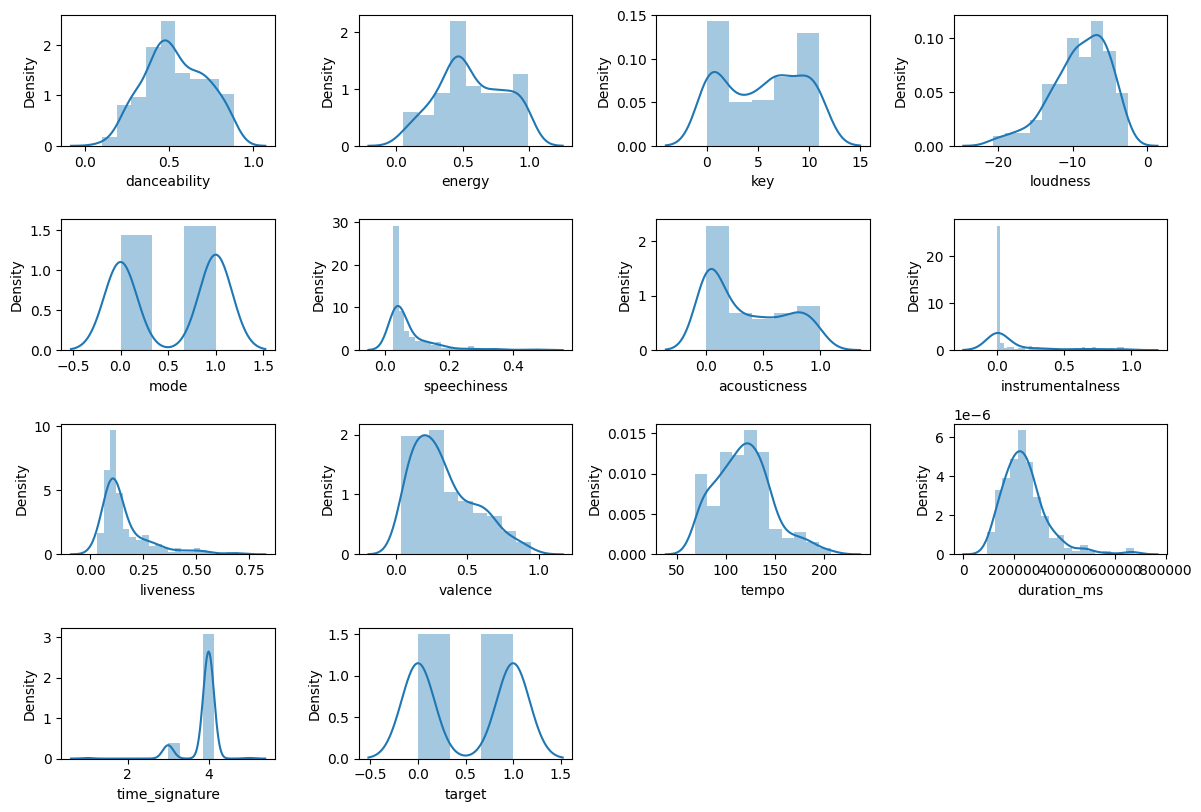

In [192]:
import seaborn as sns

numerical_features = result.select_dtypes(exclude=['object']).drop(['level_0', 'index'], axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

In [193]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


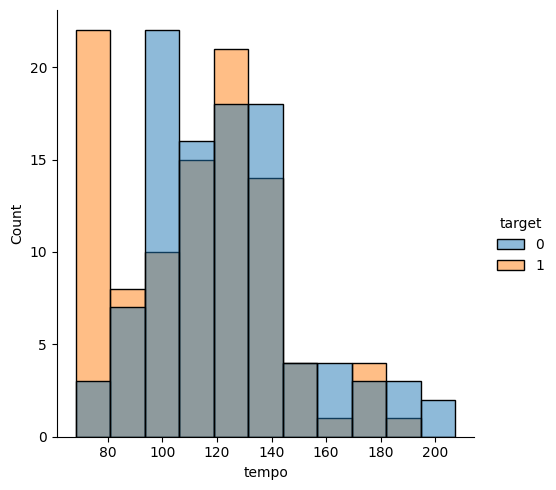

In [194]:
sns.displot(data=numerical_features, x="tempo", hue="target")

In [196]:
import matplotlib.pyplot as plt

color = []

for i in range(0, len(y)):
    if y[i] == 0:
        color.append("blue")
    else:
        color.append("magenta")

In [210]:
columns = []

for col in X.columns:
    columns.append(col)

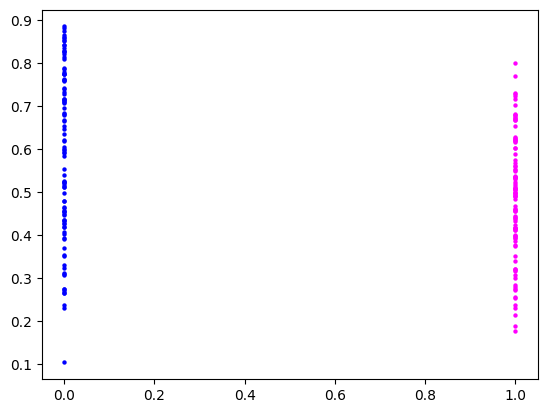

In [211]:
for i in range(0, 200):
    plt.scatter(y[i], X[columns[0]][i], c=color[i], s=10, linewidth = 0)

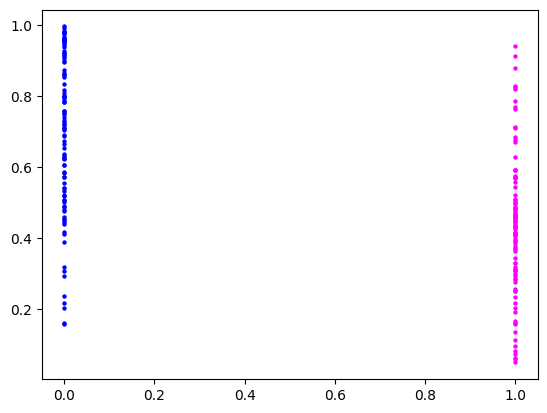

In [199]:
for i in range(0, 200):
    plt.scatter(y[i], X[columns[1]][i], c=color[i], s=10, linewidth = 0)

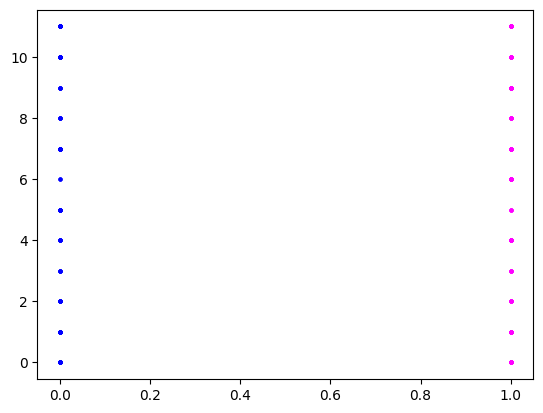

In [200]:
for i in range(0, 200):
    plt.scatter(y[i], X[columns[2]][i], c=color[i], s=10, linewidth = 0)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [202]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [203]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  3],
       [ 2, 22]], dtype=int64)

In [204]:
acc = accuracy_score(y_test, y_pred)
print('\n Accuracy Score:', acc)

f1 = f1_score(y_test, y_pred, average='macro')
print('\n F1 Score:', f1)

auc = roc_auc_score(y_test, y_pred)
print('\n AUC Score:', auc)


 Accuracy Score: 0.9

 F1 Score: 0.8999599839935974

 AUC Score: 0.9006410256410255


In [205]:
cv = cross_val_score(clf, X, y, cv=5)
cv

array([0.85 , 0.775, 0.85 , 0.9  , 0.825])

In [206]:
class_1_tpr = cm[0, 0]
class_2_tpr = cm[1, 1]

class_1 = np.sum(cm[0, :])
class_2 = np.sum(cm[1, :])

sens = class_1_tpr / class_1
spec = class_2_tpr / class_2

In [207]:
print('Sensitivity:', sens)
print('Specifity:', spec)

Sensitivity: 0.8846153846153846
Specifity: 0.9166666666666666
